In [859]:
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Boston.csv'

Boston = pd.read_csv(url)

In [860]:
Boston['logCrim'] =  np.log( Boston['crim'] )

Y = Boston['logCrim']

X = Boston['dis']

In [861]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.3 , random_state=123)

In [862]:
from pygam import LinearGAM, GAM, s, f

In [863]:
gam_1 = GAM(s(0, n_splines=4, spline_order=3 , penalties='none' )).fit(X_train, Y_train)

# n_splines = k + spline_order = nº de betas (sin contar beta0)
# k + 1 = nº intervalos = n_splines - spline_order + 1 = 4 - 3 + 1 = 2 (en este caso)
# Los intervalos que supongo que se usan son:  [Q0, Q25),[Q25, Q50),[Q50, Q75),[Q75,Q100)

In [864]:
gam_1.summary()

GAM                                                                                                       
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                         4.0
Link Function:                     IdentityLink Log Likelihood:                                  -660.1278
Number of Samples:                          354 AIC:                                             1330.2555
                                                AICc:                                             1330.428
                                                GCV:                                                2.0564
                                                Scale:                                              2.0147
                                                Pseudo R-Squared:                                   0.5516
Feature Function                  Lam

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17548\326973348.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_1.summary()


In [865]:
import matplotlib.pyplot as plt

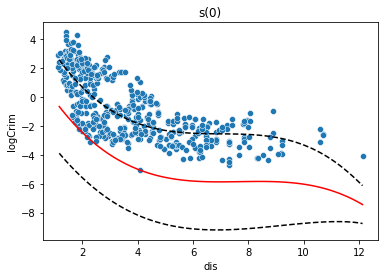

In [866]:
for i, term in enumerate(gam_1.terms):
    if term.isintercept:
        continue

    XX = gam_1.generate_X_grid(term=i)
    pdep, confi = gam_1.partial_dependence(term=i, X=XX, width=0.95)

    plt.figure()
    plt.plot(XX[:, term.feature], pdep, color='red')
    plt.plot(XX[:, term.feature], confi, color='black', ls='--')
    sns.scatterplot(data=Boston, x="dis", y="logCrim")
    plt.title(repr(term))
    plt.show()

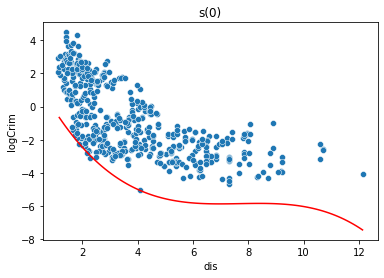

In [867]:
for i, term in enumerate(gam_1.terms):
    if term.isintercept:
        continue

    XX = gam_1.generate_X_grid(term=i)
    pdep, confi = gam_1.partial_dependence(term=i, X=XX, width=0.95)

    plt.figure()
    plt.plot(XX[:, term.feature], pdep, color='red')
    sns.scatterplot(data=Boston, x="dis", y="logCrim")
    plt.title(repr(term))
    plt.savefig('p3.png', format='png', dpi=1200)
    plt.show()

In [868]:
ECM_test_GAM_1 = sum(( Y_test - gam_1.predict(X_test) )**2) / len(Y_test)

In [869]:
ECM_test_GAM_1

2.0835966012179585

In [870]:
gam_1_penalizado = GAM(s(0, n_splines=4, spline_order=3 , lam=0.6 )).fit(X_train, Y_train)

In [871]:
gam_1_penalizado.summary()

GAM                                                                                                       
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      2.1451
Link Function:                     IdentityLink Log Likelihood:                                  -711.2983
Number of Samples:                          354 AIC:                                             1428.8868
                                                AICc:                                            1428.9613
                                                GCV:                                                2.4505
                                                Scale:                                              2.4238
                                                Pseudo R-Squared:                                   0.4577
Feature Function                  Lam

C:\Users\Usuario\AppData\Local\Temp\ipykernel_17548\4201017806.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_1_penalizado.summary()


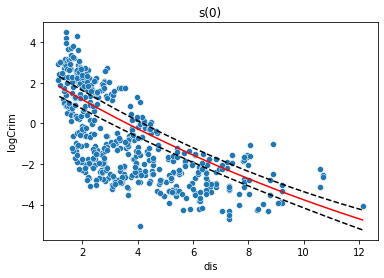

In [872]:
for i, term in enumerate(gam_1_penalizado.terms):
    if term.isintercept:
        continue

    XX = gam_1_penalizado.generate_X_grid(term=i)
    pdep, confi = gam_1_penalizado.partial_dependence(term=i, X=XX, width=0.95)

    plt.figure()
    plt.plot(XX[:, term.feature], pdep, color='red')
    plt.plot(XX[:, term.feature], confi, color='black', ls='--')
    sns.scatterplot(data=Boston, x="dis", y="logCrim")
    plt.title(repr(term))
    plt.show()

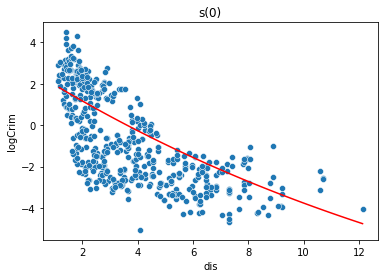

In [873]:
for i, term in enumerate(gam_1_penalizado.terms):
    if term.isintercept:
        continue

    XX = gam_1_penalizado.generate_X_grid(term=i)
    pdep, confi = gam_1_penalizado.partial_dependence(term=i, X=XX, width=0.95)

    plt.figure()
    plt.plot(XX[:, term.feature], pdep, color='red')
    sns.scatterplot(data=Boston, x="dis", y="logCrim")
    plt.title(repr(term))
    plt.savefig('p4.png', format='png', dpi=1200)
    plt.show()

In [874]:
ECM_test_GAM_1_penalizado = sum(( Y_test - gam_1_penalizado.predict(X_test) )**2) / len(Y_test)

In [875]:
ECM_test_GAM_1_penalizado

2.3755932909152495

In [876]:
gam_2 = GAM(s(0, n_splines=6, spline_order=3 , penalties='none')).fit(X_train, Y_train)

# n_splines = k + spline_order = nº de betas (sin contar beta0)
# k + 1 = nº intervalos = n_splines - spline_order + 1 = 6 - 3 + 1 = 4 (en este caso)
# Los intervalos que supongo que se usan son:  [Q0, Q25),[Q25, Q50),[Q50, Q75),[Q75,Q100)

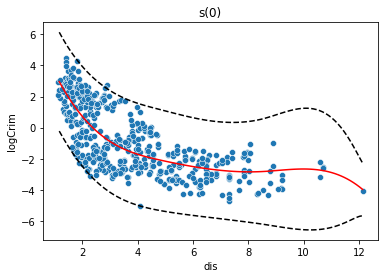

In [877]:
for i, term in enumerate(gam_2.terms):
    if term.isintercept:
        continue

    XX = gam_2.generate_X_grid(term=i)
    pdep, confi = gam_2.partial_dependence(term=i, X=XX, width=0.95)

    plt.figure()
    plt.plot(XX[:, term.feature], pdep, color='red')
    plt.plot(XX[:, term.feature], confi, color='black', ls='--')
    sns.scatterplot(data=Boston, x="dis", y="logCrim")
    plt.title(repr(term))
    plt.show()

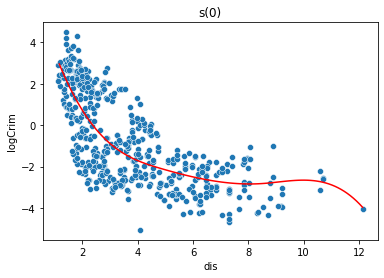

In [878]:
for i, term in enumerate(gam_2.terms):
    if term.isintercept:
        continue

    XX = gam_2.generate_X_grid(term=i)
    pdep, confi = gam_2.partial_dependence(term=i, X=XX, width=0.95)

    plt.figure()
    plt.plot(XX[:, term.feature], pdep, color='red')
    sns.scatterplot(data=Boston, x="dis", y="logCrim")
    plt.title(repr(term))
    plt.savefig('p5.png', format='png', dpi=1200)
    plt.show()

In [879]:
ECM_test_GAM_2 = sum(( Y_test - gam_2.predict(X_test) )**2) / len(Y_test)

In [880]:
ECM_test_GAM_2

2.0582018952364134

In [881]:
gam_2_penalizado = GAM(s(0, n_splines=6, spline_order=3 , lam=0.6 )).fit(X_train, Y_train)


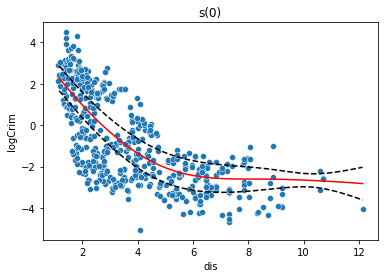

In [882]:
for i, term in enumerate(gam_2_penalizado.terms):
    if term.isintercept:
        continue

    XX = gam_2_penalizado.generate_X_grid(term=i)
    pdep, confi = gam_2_penalizado.partial_dependence(term=i, X=XX, width=0.95)

    plt.figure()
    plt.plot(XX[:, term.feature], pdep, color='red')
    plt.plot(XX[:, term.feature], confi, color='black', ls='--')
    sns.scatterplot(data=Boston, x="dis", y="logCrim")
    plt.title(repr(term))
    plt.show()

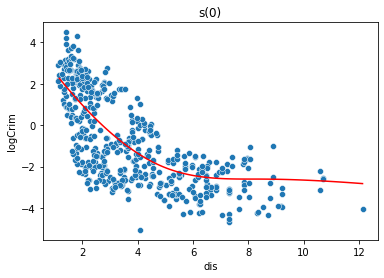

In [883]:


for i, term in enumerate(gam_2_penalizado.terms):
    if term.isintercept:
        continue

    XX = gam_2_penalizado.generate_X_grid(term=i)

     
    plt.figure()
    plt.plot(XX[:, term.feature], pdep, color='red')
    sns.scatterplot(data=Boston, x="dis", y="logCrim")
    plt.savefig('p6.png', format='png', dpi=1200)
    plt.title(repr(term))
    plt.show()

In [884]:
ECM_test_GAM_2_penalizado = sum(( Y_test - gam_2_penalizado.predict(X_test) )**2) / len(Y_test)

In [885]:
ECM_test_GAM_2_penalizado

2.0803886687764868

In [886]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


In [887]:
X_train_1 = PolynomialFeatures(degree=1).fit_transform(np.array(X_train).reshape(-1, 1))
X_train_2 = PolynomialFeatures(degree=2).fit_transform(np.array(X_train).reshape(-1, 1))
X_train_3 = PolynomialFeatures(degree=3).fit_transform(np.array(X_train).reshape(-1, 1))

In [888]:
X_train.head()

273    4.3665
52     6.8147
181    2.5979
452    2.3682
381    1.5192
Name: dis, dtype: float64

In [889]:
X_train_2

array([[ 1.        ,  4.3665    , 19.06632225],
       [ 1.        ,  6.8147    , 46.44013609],
       [ 1.        ,  2.5979    ,  6.74908441],
       ...,
       [ 1.        ,  4.7211    , 22.28878521],
       [ 1.        ,  1.5804    ,  2.49766416],
       [ 1.        ,  1.6132    ,  2.60241424]])

In [890]:
X_train_3

array([[  1.        ,   4.3665    ,  19.06632225,  83.2530961 ],
       [  1.        ,   6.8147    ,  46.44013609, 316.47559541],
       [  1.        ,   2.5979    ,   6.74908441,  17.53344639],
       ...,
       [  1.        ,   4.7211    ,  22.28878521, 105.22758385],
       [  1.        ,   1.5804    ,   2.49766416,   3.94730844],
       [  1.        ,   1.6132    ,   2.60241424,   4.19821465]])

In [891]:
fit = LinearRegression().fit(X=X_train_3, y=Y_train)

In [892]:
fit.intercept_

5.950341959209399

In [893]:
fit.coef_

array([ 0.        , -3.43113265,  0.45071005, -0.01956285])

In [894]:
X_test_3 = PolynomialFeatures(degree=3).fit_transform(np.array(X_test).reshape(-1, 1))

X_train_3 = PolynomialFeatures(degree=3).fit_transform(np.array(X_train).reshape(-1, 1))

In [895]:
ECM_polinomio_3 = sum( ( Y_test - fit.predict(X_test_3)  )**2 ) / len(Y_test)

In [896]:
ECM_polinomio_3

2.0835991159477456

In [897]:
Y_pred_train = fit.predict(X_train_3)

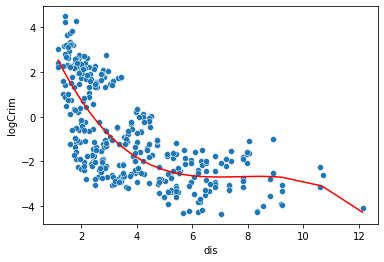

In [898]:
fig, ax = plt.subplots()

sns.scatterplot(x=X_train, y=Y_train)
sns.lineplot(x=X_train, y=Y_pred_train , color='red')

fig.savefig('p1.jpg', format='jpg', dpi=1200)

In [899]:
intervals = [X_train.min(), X_train.quantile(0.25), X_train.quantile(0.5), X_train.quantile(0.75), X_train.max() + 0.1]


In [900]:
pd.cut(x=X_train , bins=intervals )

273     (3.295, 5.227]
52     (5.227, 12.226]
181     (2.114, 3.295]
452     (2.114, 3.295]
381     (1.169, 2.114]
            ...       
98      (3.295, 5.227]
476     (2.114, 3.295]
322     (3.295, 5.227]
382     (1.169, 2.114]
365     (1.169, 2.114]
Name: dis, Length: 354, dtype: category
Categories (4, interval[float64, right]): [(1.169, 2.114] < (2.114, 3.295] < (3.295, 5.227] < (5.227, 12.226]]

In [901]:
pd.cut(x=X_train , bins=intervals , labels=False)

273    2.0
52     3.0
181    1.0
452    1.0
381    0.0
      ... 
98     2.0
476    1.0
322    2.0
382    0.0
365    0.0
Name: dis, Length: 354, dtype: float64

In [902]:
X_train_cat = pd.cut(x=X_train , bins=intervals , labels=False)

In [903]:
def varcharProcessing(X, varchar_process = "dummy_dropfirst"):
    
    dtypes = X.dtypes

    if varchar_process == "drop":   
        X = X.drop(columns = dtypes[dtypes == np.object].index.tolist())

    elif varchar_process == "dummy":
        X = pd.get_dummies(X,drop_first=False)

    elif varchar_process == "dummy_dropfirst":
        X = pd.get_dummies(X,drop_first=True)

    else: 
        X = pd.get_dummies(X,drop_first=True)
    
    X["intercept"] = 1
    cols = X.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    X = X[cols]
    
    return X

In [904]:
X_train_cat_dummies = varcharProcessing(X_train_cat , varchar_process = "dummy_dropfirst")

X_train_cat_dummies

,intercept,1.0,2.0,3.0
273,1,0,1,0
52,1,0,0,1
181,1,1,0,0
452,1,1,0,0
381,1,0,0,0
...,...,...,...,...
98,1,0,1,0
476,1,1,0,0
322,1,0,1,0
382,1,0,0,0


In [905]:
fit_escalon = LinearRegression().fit(X=X_train_cat_dummies , y=Y_train)

c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [906]:
intervals = [X_test.min(), X_test.quantile(0.25), X_test.quantile(0.5), X_test.quantile(0.75), X_test.max() + 0.1]

X_test_cat = pd.cut(x=X_test , bins=intervals , labels=False)

In [907]:
X_test_cat_dummies = varcharProcessing(X_test_cat , varchar_process = "dummy_dropfirst")

In [908]:
ECM_escalon = sum( ( Y_test - fit.predict(X_test_cat_dummies)  )**2 ) / len(Y_test)

c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [909]:
ECM_escalon

42.0037997826327

c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(


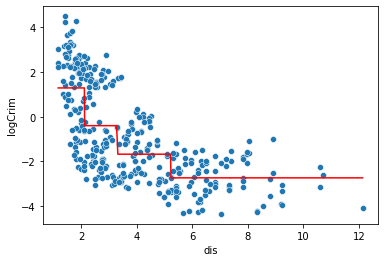

In [910]:
Y_pred_train = fit_escalon.predict(X_train_cat_dummies)

fig, ax = plt.subplots()

sns.scatterplot(x=X_train, y=Y_train)
sns.lineplot(x=X_train, y=Y_pred_train , color='red')

fig.savefig('p2.jpg', format='jpg', dpi=1200)